In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 7(Surv Anlys)/_0415_features_without_nans_survival.csv')

In [3]:
data.drop(columns='Unnamed: 0', inplace=True)

In [4]:
data

,Age,Gender,onset_delta,diag_delta,diag_minus_onset,mean_alsfrs_total,alsfrs_total_slope,fvc_slope,fvc_mean,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status,onset_site_1,onset_site_2,onset_site_3
0,52.0,0,-501.0,-302.0,199.0,30.250000,-0.009689,-0.931358,103.293488,4.00,4.000000,4.00,3.50,2.00,2.250000,3.50,2.000000,1.000000,4.00,8.00,14.250000,0.000000,0.000000,0.000000,0.016393,0.000000,-0.016393,0.016393,0.000000,0.000000,0.000000,0.000000,-0.016393,401,0,0,0,0
1,65.0,0,-1023.0,-44.0,979.0,28.666667,0.002114,-0.583333,73.500000,1.00,1.333333,2.00,4.00,4.00,3.333333,4.00,3.333333,2.666667,3.00,3.00,21.333333,-0.010989,-0.010989,0.000000,0.000000,0.000000,-0.010989,0.010989,0.010989,0.010989,0.000000,-0.010989,0.010989,378,0,1,0,0
2,66.0,0,-550.0,-462.0,88.0,32.000000,-0.043752,0.076462,52.652720,0.75,2.750000,0.75,4.00,4.00,4.000000,4.00,4.000000,4.000000,3.75,1.50,24.000000,0.000000,-0.014493,-0.014493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014493,-0.014493,0.000000,434,0,1,0,0
3,41.0,1,-570.0,-511.0,59.0,16.500000,-0.104167,0.000000,71.000000,2.50,3.000000,3.00,1.50,1.00,1.000000,0.50,0.500000,0.000000,3.50,5.50,4.500000,-0.020833,-0.041667,0.000000,-0.020833,0.000000,0.000000,-0.020833,-0.020833,0.000000,0.020833,-0.020833,-0.062500,542,0,0,1,0
4,63.0,1,-365.0,-209.0,156.0,30.000000,0.000000,-0.235294,114.000000,4.00,4.000000,4.00,3.00,3.00,2.000000,3.00,3.000000,1.000000,3.00,8.00,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,401,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,43.0,1,-673.0,-293.0,380.0,22.750000,-0.033444,0.678853,95.564652,3.00,3.750000,3.00,2.00,1.25,1.000000,2.00,2.000000,0.750000,4.00,6.00,9.000000,0.000000,-0.012821,0.000000,0.000000,-0.012821,0.000000,0.012821,0.000000,-0.012821,0.000000,0.000000,-0.025641,384,0,0,1,0
1646,70.0,1,-332.0,-181.0,151.0,29.500000,-0.090079,-0.270229,65.989389,1.25,1.500000,2.50,4.00,2.75,3.500000,4.00,3.750000,3.000000,3.25,3.75,21.000000,-0.014085,-0.028169,-0.014085,0.000000,-0.014085,-0.014085,0.014085,-0.014085,0.000000,0.014085,-0.028169,-0.042254,436,0,1,0,0
1647,46.0,0,-274.0,-212.0,62.0,20.500000,-0.055424,-0.608825,89.564790,1.50,3.250000,3.00,2.25,1.00,0.500000,2.25,2.000000,0.750000,4.00,4.50,8.750000,0.000000,0.011765,-0.011765,-0.035294,0.000000,0.000000,0.011765,0.000000,-0.011765,0.000000,-0.011765,-0.058824,410,0,1,0,0
1648,62.0,1,-288.0,-110.0,178.0,36.000000,0.000000,0.086856,138.802286,4.00,4.000000,4.00,4.00,4.00,3.000000,3.50,3.000000,2.500000,4.00,8.00,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.000000,444,0,0,1,0


In [5]:
data.isna().sum()

Age                              0
Gender                           0
onset_delta                      0
diag_delta                       0
diag_minus_onset                 0
mean_alsfrs_total                0
alsfrs_total_slope               0
fvc_slope                        0
fvc_mean                         0
mean_Q1_Speech                   0
mean_Q2_Salivation               0
mean_Q3_Swallowing               0
mean_Q4_Handwriting              0
mean_Q5_Cutting                  0
mean_Q6_Dressing_and_Hygiene     0
mean_Q7_Turning_in_Bed           0
mean_Q8_Walking                  0
mean_Q9_Climbing_Stairs          0
mean_Q10_Respiratory             0
mean_Bulbar                      0
mean_motor                       0
slope_Q1_Speech                  0
slope_Q2_Salivation              0
slope_Q3_Swallowing              0
slope_Q4_Handwriting             0
slope_Q5_Cutting                 0
slope_Q6_Dressing_and_Hygiene    0
slope_Q7_Turning_in_Bed          0
slope_Q8_Walking    

In [6]:
y = data[['status']]

In [7]:
feat_list = ['Age', 'Gender', 'onset_site_1','onset_site_2', 'onset_site_3', 'onset_delta',
       'diag_minus_onset', 'alsfrs_total_slope',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory', 'time_event', 'status'
       ]

Train/test 분할

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(data[feat_list], y, train_size=0.8, test_size=0.2, random_state=11)

Sample size 계산

In [9]:
pip install lifelines

     |████████████████████████████████| 348kB 7.6MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4035 sha256=b29f4440031e7dfaa2931e88d01e5f05ee63bbeaf0c88dd3b2c4bbbe821ea45f
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [10]:
from lifelines.statistics import sample_size_necessary_under_cph

desired_power = 0.8
ratio_of_participants = 1.
p_exp = 0.25
p_con = 0.35
postulated_hazard_ratio = 0.7
n_exp, n_con = sample_size_necessary_under_cph(desired_power, ratio_of_participants, p_exp, p_con, postulated_hazard_ratio)

모델 적용하기

In [11]:
from lifelines import CoxPHFitter

In [12]:
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df_train, 'time_event', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1320 total observations, 1130 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1320
number of events observed = 190
   partial log-likelihood = -980.60
         time fit was run = 2021-04-29 16:27:38 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.05       1.05       0.01             0.03             0.06                 1.03                 1.06
Gender                          0.06       1.06       0.16            -0.25             0.37                 0.78                 1.45
onset_site_1                    0.34       1.40       0.33            -0.31             0.98                 0.74                 2.66
onset_site_2                    0.05       1.05       0.27            -0.48             0.58                 0.62                 1.78
onset_site_3                    0.76       2.15       0.66            -0.53             2.06                 0.59                 7.85
onset_delta                     0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diag_minus_onset                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
alsfrs_total_slope              0.01       1.01       2.71            -5.29             5.32                 0.01               204.23
fvc_slope                      -0.14       0.87       0.32            -0.77             0.50                 0.46                 1.65
fvc_mean                       -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
mean_Q10_Respiratory            0.02       1.02       0.12            -0.22             0.26                 0.81                 1.30
mean_Bulbar                    -0.02       0.98       0.06            -0.15             0.10                 0.86                 1.10
mean_motor                     -0.05       0.95       0.02            -0.09            -0.02                 0.92                 0.98
slope_Q1_Speech                -0.45       0.63       6.68           -13.54            12.63                 0.00             3.05e+05
slope_Q2_Salivation           -10.90       0.00       7.22           -25.06             3.26                 0.00                26.16
slope_Q3_Swallowing             7.50    1816.13       6.93            -6.07            21.08                 0.00             1.43e+09
slope_Q4_Handwriting           -1.35       0.26       5.92           -12.96            10.26                 0.00             28507.26
slope_Q5_Cutting               -0.02       0.98       7.06           -13.85            13.81                 0.00             9.95e+05
slope_Q6_Dressing_and_Hygiene  -6.19       0.00       6.99           -19.90             7.51                 0.00              1834.94
slope_Q7_Turning_in_Bed        -2.02       0.13       4.12           -10.10             6.06                 0.00               427.94
slope_Q8_Walking              -12.95       0.00       8.19           -29.00             3.10                 0.00                22.22
slope_Q9_Climbing_Stairs       -2.87       0.06       5.06           -12.78             7.04                 0.00              1139.00
slope_Q10_Respiratory          -9.97       0.00       5.62           -20.99             1.04                 0.00                 2.84

                                  z      p   -log2(p)
covariate                                            
Age                            6.44 <0.005      33.00
Gender                        

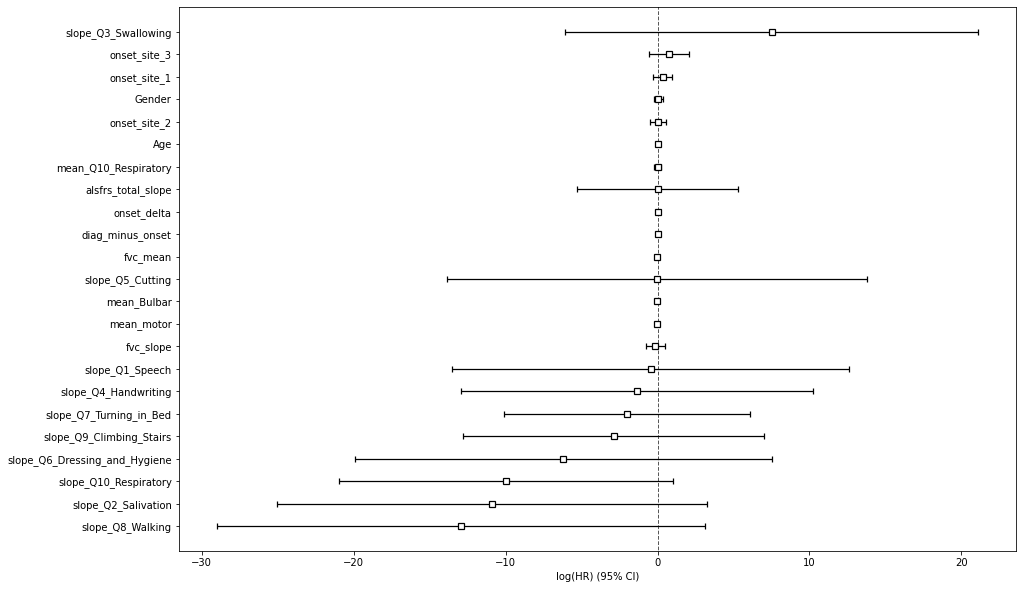

In [13]:
plt.figure(figsize=(15,10))
cph.plot()
#HR >1, 즉 log(HR)>0 이면 사망 위험 증가를 뜻함

Test 데이터에 대해 예측하기

In [14]:
df_test_X = df_test.drop(columns=['time_event', 'status'])

In [15]:
# Selecting 3 random subjects to predict survival
test_1 = df_test_X.iloc[-5:, :]

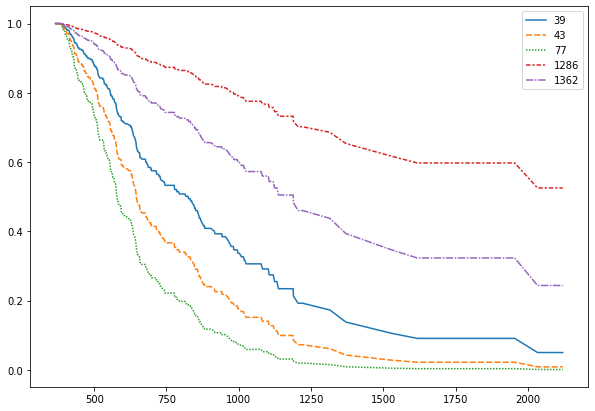

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
result = cph.predict_survival_function(test_1)
sns.lineplot(data = result)

In [17]:
df_test.iloc[-5:, -2:]

,time_event,status
77,425,1
1362,378,0
1286,461,0
39,378,0
43,585,0


모델 평가하기 with 5-fold cv

In [18]:
from lifelines.utils import k_fold_cross_validation

In [19]:
import inspect
inspect.getargspec(k_fold_cross_validation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  


ArgSpec(args=['fitters', 'df', 'duration_col', 'event_col', 'k', 'scoring_method', 'fitter_kwargs'], varargs=None, keywords=None, defaults=(None, 5, 'log_likelihood', {}))

In [20]:
cph = CoxPHFitter()
C_Idx = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    arr = k_fold_cross_validation(cph, df_train, 'time_event', event_col='status', k=5, scoring_method="concordance_index")
    C_Idx = np.concatenate((C_Idx, arr))
print(C_Idx)

[0.73531627 0.69846762 0.67621899 0.63162151 0.64798206 0.67232729
 0.68413598 0.70904544 0.65531736 0.69180471 0.64395307 0.74573582
 0.63055556 0.62079927 0.67638266 0.69482976 0.66766917 0.53644444
 0.70897683 0.72396487 0.63690156 0.66970199 0.74900239 0.62981787
 0.60689655 0.69372251 0.65566038 0.57142857 0.69158879 0.72824232
 0.58784107 0.63912515 0.69772013 0.66076421 0.65195509 0.69450962
 0.61269706 0.65834933 0.66488652 0.71165439 0.6466725  0.66055456
 0.65152165 0.70207762 0.69191705 0.63401293 0.62127281 0.73727
 0.68595967 0.55091278]


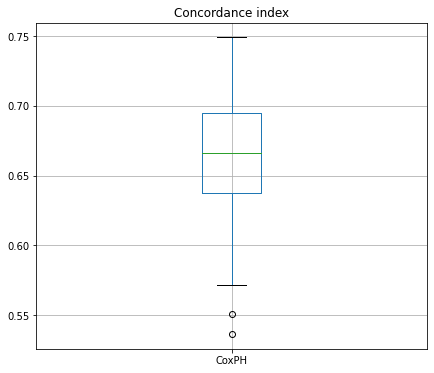

In [22]:
df = pd.DataFrame(C_Idx)
df.columns = ['CoxPH']

plt.figure(figsize=(7,6))
boxplot = df.boxplot(column=['CoxPH'])
plt.title('Concordance index')
plt.show()

Test set에서 c-index 계산

In [23]:
from lifelines.utils import concordance_index
cph = CoxPHFitter().fit(df_test, 'time_event', 'status')
print(concordance_index(df_test['time_event'], -cph.predict_partial_hazard(df_test), df_test['status']))

0.7740288568257492


/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1110: ConvergenceWarning: Column onset_site_3 have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['status'].astype(bool)
>>> print(df.loc[events, 'onset_site_3'].var())
>>> print(df.loc[~events, 'onset_site_3'].var())

A very low variance means that the column onset_site_3 completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/lifelines/fitters/coxph_fitter.py:1588: ConvergenceWarning: Newton-Rhaphson convergence completed successfully but norm(delta) is still high, 0.134. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or comp

모델 평가하기 1 - Calibration

In [24]:
# k-fold 교차 검증을 통해 구한 생존함수 추정치들의 사분위수 (quartile)를 구하고, 이를 이용하여 전체 자료를 4 등분한다. 
# 각 등분에서 t시점에서의 생존함수 S(t)를 Kaplan-Meier 추정량을 이용하여 추정한다. 
# 각 등분에서 k-fold 교차 검증을 이용하여 구한 S_hat(t;Z)들의 평균을 계산한다.
# 각 등분의 S_hat(t)와 평균을 쌍으로 나타낸 도표를 calibration 도표라고 부르며 적합된 모형이 완벽하다면 이 쌍들이 45도 선 위에 위치하게 된다.

모델 평가하기 2 - Discrimination(AUC(t))

In [25]:
# 자료 내 모든 개체들을 t시점까지 사건 발생 유무에 따라 사례군 (case group)과 대조군 (control group)으로 나눈다. 
# 사례군에서 k-fold 교차 검증을 이용하여 구한 t시점에서의 Sb(t;Z)를 대조군에서의 t시점에서의 생존함수 추정치와 비교한다.
# AUC(t)가 1에 가깝다면 적합된 모형이 전체 자료를 사례군와 대조군으로 완벽하게 분류할 수 있음을 의미하고,0.5에 가깝거나 그 이하일 경우는 적합된 모형의 판별적 정확성이 매우 좋지 않음을 의미한다.

비례위험 가정 검토

In [26]:
df_train = df_train.reset_index()
df_train.drop(columns='index', inplace=True)
df_train

,Age,Gender,onset_site_1,onset_site_2,onset_site_3,onset_delta,diag_minus_onset,alsfrs_total_slope,fvc_slope,fvc_mean,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,time_event,status
0,44.0,1,1,0,0,-428.0,171.0,-9.367125e-17,-0.163934,73.666667,3.0,4.0,17.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.015873,0.000000,0.000000,0.000000,401,0
1,54.0,1,0,1,0,-479.0,351.0,5.555556e-02,-1.000000,73.000000,3.0,8.0,15.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,382,0
2,42.0,1,0,1,0,-476.0,464.0,-7.142857e-02,-0.040816,105.666667,4.0,8.0,16.000000,0.000000,0.000000,0.0,0.000000,-0.017857,-0.017857,0.017857,0.000000,-0.035714,0.000000,384,0
3,37.0,1,0,1,0,-770.0,185.0,-1.801064e-02,0.158215,92.250000,4.0,6.0,5.333333,0.000000,0.000000,0.0,-0.017544,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,382,0
4,65.0,0,0,1,0,-764.0,709.0,-3.386912e-02,-0.130601,131.250000,4.0,8.0,21.000000,0.000000,0.000000,0.0,0.000000,-0.016949,0.000000,0.016949,-0.016949,0.000000,0.000000,399,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,61.0,0,0,1,0,-366.0,277.0,-3.225806e-02,-0.410401,84.666667,4.0,8.0,19.500000,0.000000,0.000000,0.0,0.000000,-0.032258,0.000000,0.032258,0.000000,0.000000,0.000000,374,0
1316,41.0,0,0,1,0,-593.0,226.0,1.970312e-16,-0.215686,101.500000,4.0,7.0,18.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,809,0
1317,54.0,1,0,1,0,-421.0,257.0,5.405405e-02,-0.162162,109.000000,3.0,8.0,15.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.054054,646,1
1318,74.0,1,0,0,0,-539.0,288.0,0.000000e+00,-0.180740,117.677201,4.0,8.0,19.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,475,0


In [27]:
inspect.getfullargspec(cph.check_assumptions)

FullArgSpec(args=['self', 'training_df', 'advice', 'show_plots', 'p_value_threshold', 'plot_n_bootstraps', 'columns'], varargs=None, varkw=None, defaults=(True, False, 0.01, 15, None), kwonlyargs=[], kwonlydefaults=None, annotations={'return': None, 'training_df': <class 'pandas.core.frame.DataFrame'>, 'advice': <class 'bool'>, 'show_plots': <class 'bool'>, 'p_value_threshold': <class 'float'>, 'plot_n_bootstraps': <class 'int'>, 'columns': typing.Union[typing.List[str], NoneType]})

In [28]:
print(cph.check_assumptions(training_df=df_train, p_value_threshold=0.1))

ValueError: ignored

In [29]:
print(cph.check_assumptions(training_df=df_test, p_value_threshold=0.05))

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 330 total observations, 274 right-censored observations>
         test_name = proportional_hazard_test

---
                                    test_statistic    p  -log2(p)
Age                           km              2.63 0.10      3.25
                              rank            4.02 0.04      4.47
Gender                        km              0.49 0.48      1.05
                              rank            1.40 0.24      2.08
alsfrs_total_slope            km              0.73 0.39      1.35
                              rank            0.11 0.74      0.44
diag_minus_onset              km              0.09 0.76      0.39
                              rank            0.16 0.68      0.55
fvc_mean                      km              0.86 0.35      1.50
                              rank            1.33 0.25      2.01
fvc_slope                     km              1.86 0.17      2.53
                              rank            1.30 0.25      1.98
mean_Bulbar                   km              0.44 0.51      0.98
                              rank            0.28 0.60      0.74
mean_Q10_Respiratory          km              0.07 0.79      0.34
                              rank            0.00 0.99      0.01
mean_motor                    km              1.15 0.28      1.81
                              rank            1.76 0.19      2.43
onset_delta                   km              0.52 0.47      1.08
                              rank            1.11 0.29      1.78
onset_site_1                  km              0.39 0.53      0.91
                              rank            0.43 0.51      0.96
onset_site_2                  km              0.07 0.79      0.34
                              rank            0.12 0.73      0.46
onset_site_3                  km              0.00 1.00      0.00
                              rank            0.00 1.00      0.00
slope_Q10_Respiratory         km              2.04 0.15      2.71
                              rank            1.51 0.22      2.19
slope_Q1_Speech               km              0.01 0.92      0.13
                              rank            0.13 0.72      0.47
slope_Q2_Salivation           km              2.65 0.10      3.27
                              rank            1.78 0.18      2.45
slope_Q3_Swallowing           km              2.79 0.09      3.40
                              rank            1.67 0.20      2.35
slope_Q4_Handwriting          km              0.77 0.38      1.40
                              rank            0.09 0.76      0.39
slope_Q5_Cutting              km              0.71 0.40      1.32
                              rank            0.17 0.68      0.55
slope_Q6_Dressing_and_Hygiene km              0.00 0.97      0.05
                              rank            0.40 0.53      0.92
slope_Q7_Turning_in_Bed       km              0.75 0.39      1.37
                              rank            1.65 0.20      2.33
slope_Q8_Walking              km              0.03 0.86      0.22
                              rank            0.47 0.49      1.02
slope_Q9_Climbing_Stairs      km              2.07 0.15      2.73
                              rank            0.86 0.35      1.49



1. Variable 'Age' failed the non-proportional test: p-value is 0.0450.

   Advice 1: the functional form of the variable 'Age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Age' using pd.cut, and then specify it in `strata=['Age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varyi

In [ ]:
from lifelines.statistics import proportional_hazard_test

results = proportional_hazard_test(cph, df_test, time_transform='rank')
results.print_summary(decimals=3, model="cph")